# Seaborn - 기본 그래프

## #01. 준비작업

### [1] 패키지 참조

In [7]:
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, melt

### [2] 그래프 초기화

In [8]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

## #02. 기본 그래프

| 그래프 | 코드 |
| -- | -- |
| 선 | sb.lineplot |
| 막대 | sb.barplot |
| 산점도 | sb.scatterplot |
| 추세선 | sb.regplot |

pie 그래프는 제공되지 않음

### [1] 선 그래프

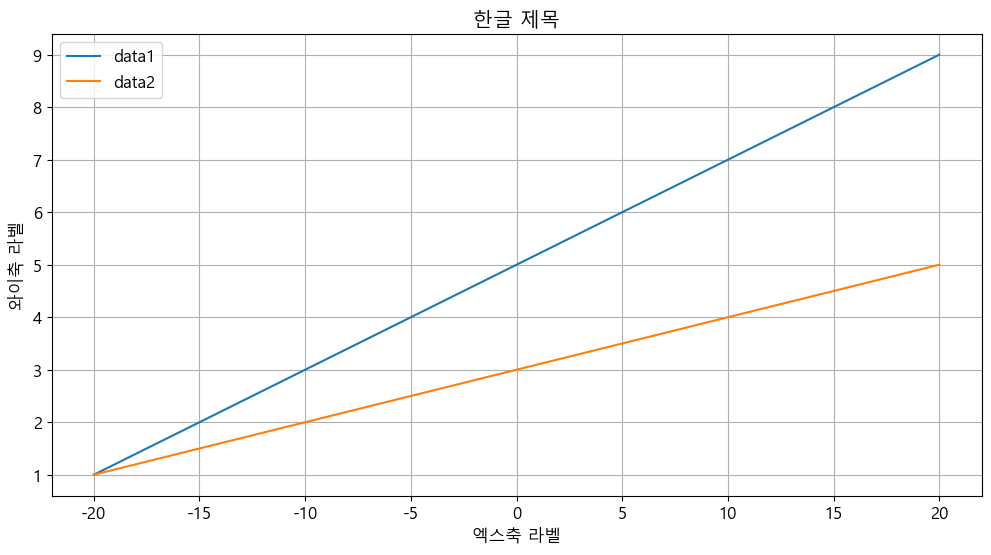

In [9]:
plt.figure()

# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(x=[-20, -10, 0, 10, 20], y=[1, 3, 5, 7, 9], label='data1')
sb.lineplot(x=[-20, -10, 0, 10, 20], y=[1, 2, 3, 4, 5], label='data2')

# 그 밖의 옵션은 matplotlib와 동일
plt.title('한글 제목')        
plt.xlabel("엑스축 라벨")     
plt.ylabel("와이축 라벨")     
plt.legend()
plt.grid()
plt.show()                  
plt.close()                 

### [2] 세로 막대 그래프

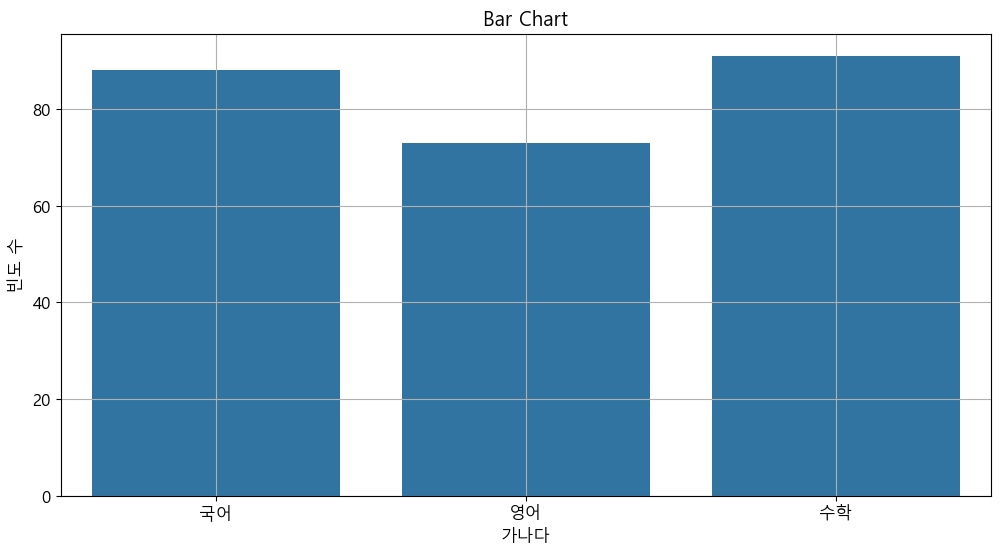

In [10]:
plt.figure()

sb.barplot(x=['국어', '영어', '수학'], y=[88, 73, 91]) # seaborn은 x의 값을 숫자로 주는것 보다 그냥 수치로 주는게 일반적이다.

plt.title("Bar Chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()

### [3] 가로 막대 그래프

x축과 y축을 바꿔서 설정한다.

색상 테마를 변경하고자 한다면 `palette` 파라미터에 `deep, muted, pastel, bright, dark, colorblind, Spectral` 등의 값을 설정할 수 있다.

C:\Users\hyk\AppData\Local\Temp\ipykernel_5608\1495753910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=[20, 30, 10], y=["서울", "부산", "제주"], label='data', palette="muted")


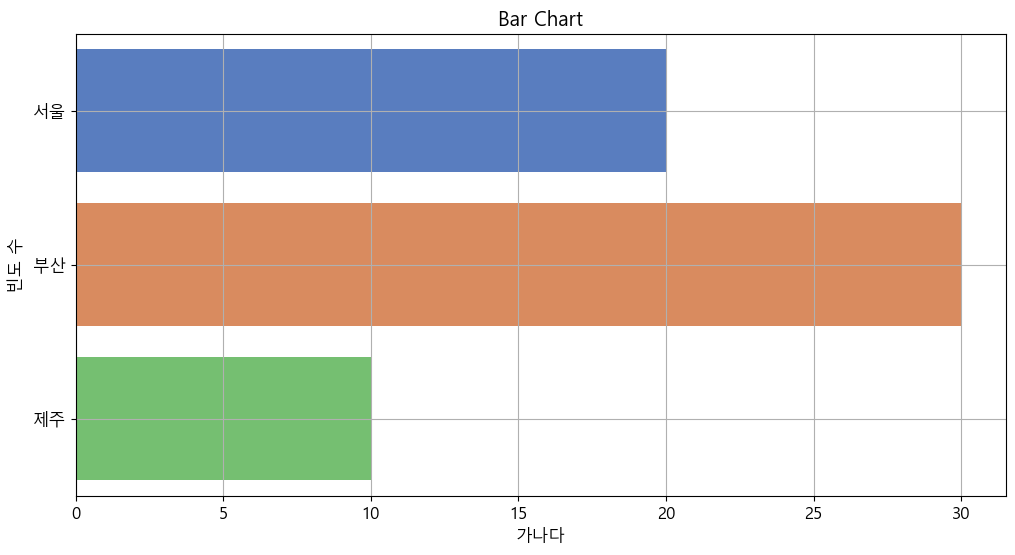

In [11]:
plt.figure()

sb.barplot(x=[20, 30, 10], y=["서울", "부산", "제주"], label='data', palette="muted")

plt.grid()
plt.title("Bar Chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()
plt.close()

### [4] 산점도 그래프

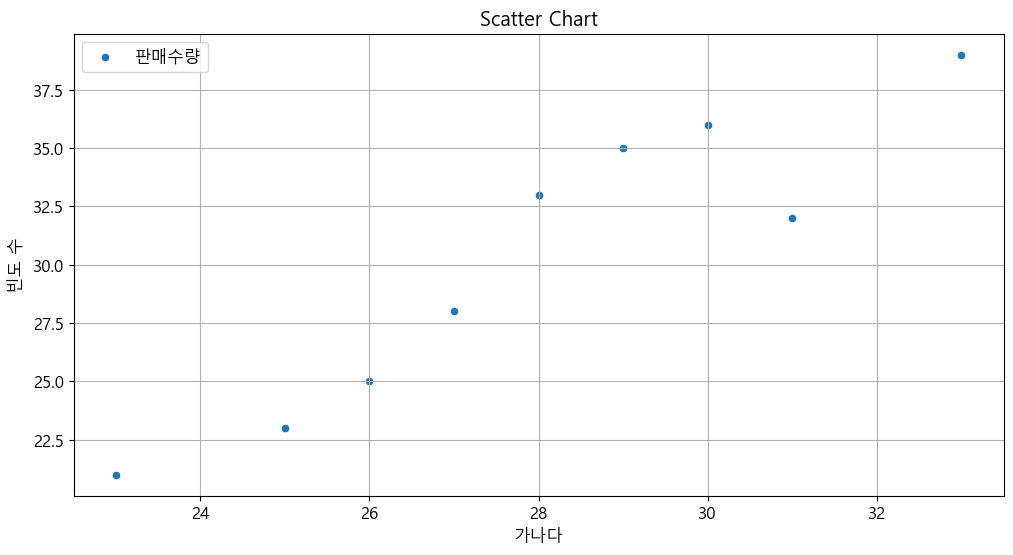

In [12]:
plt.figure()

# 온도와 아이스크림 판매 수량
tmp = [ 23, 25, 26, 27, 28, 29, 30, 31, 33 ]
qty = [ 21, 23, 25, 28, 33, 35, 36, 32, 39 ]

sb.scatterplot(x=tmp, y=qty, label='판매수량')

plt.title("Scatter Chart")
plt.grid()
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()
plt.close()

## #03. 데이터 프레임을 통한 그래프

### [1] 데이터 준비

#### (1) 데이터 가져오기

In [13]:
origin = read_excel("https://data.hossam.kr/pydata/traffic_acc.xlsx")
origin.head()

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808


#### (2) 데이터 전처리

연도별 월 평균 데이터로 전처리 수행

In [14]:
df = origin.drop('월', axis=1).groupby('년도').mean()
df.head()

,발생건수,사망자수,부상자수
년도,,,
2005,17847.583333,531.333333,28519.416667
2006,17812.083333,527.250000,28352.416667
2007,17638.500000,513.833333,27992.166667
2008,17985.166667,489.166667,28246.833333
2009,19332.500000,486.500000,30156.250000


### [2] 선 그래프

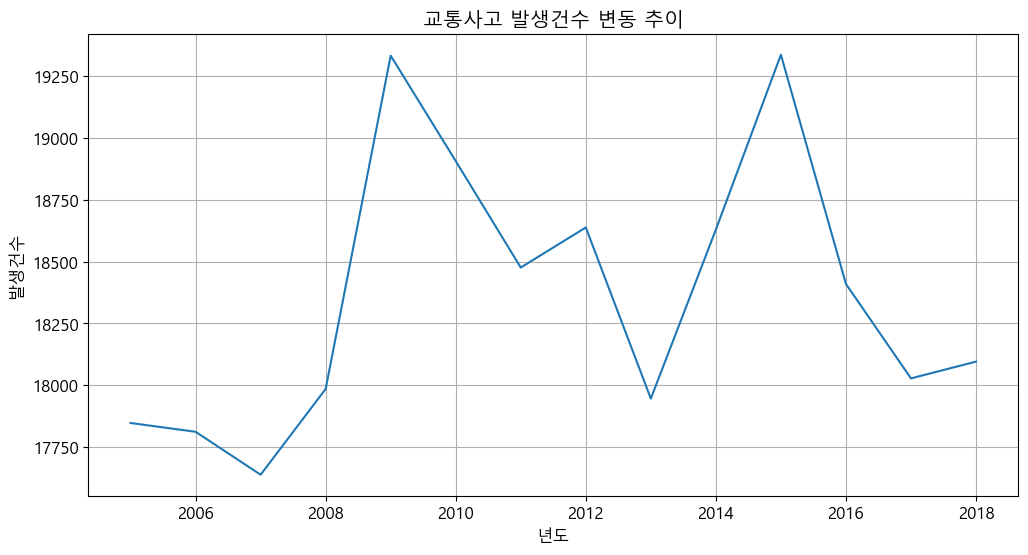

In [15]:
plt.figure()

# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(data=df, x=df.index, y='발생건수')

plt.title('교통사고 발생건수 변동 추이')   
plt.xlabel("년도")      
plt.ylabel("발생건수")  
plt.grid()
plt.show()             
plt.close()            

### [3] 막대 그래프

C:\Users\hyk\AppData\Local\Temp\ipykernel_5608\2058900756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df, x=df.index, y='사망자수', palette='pastel')


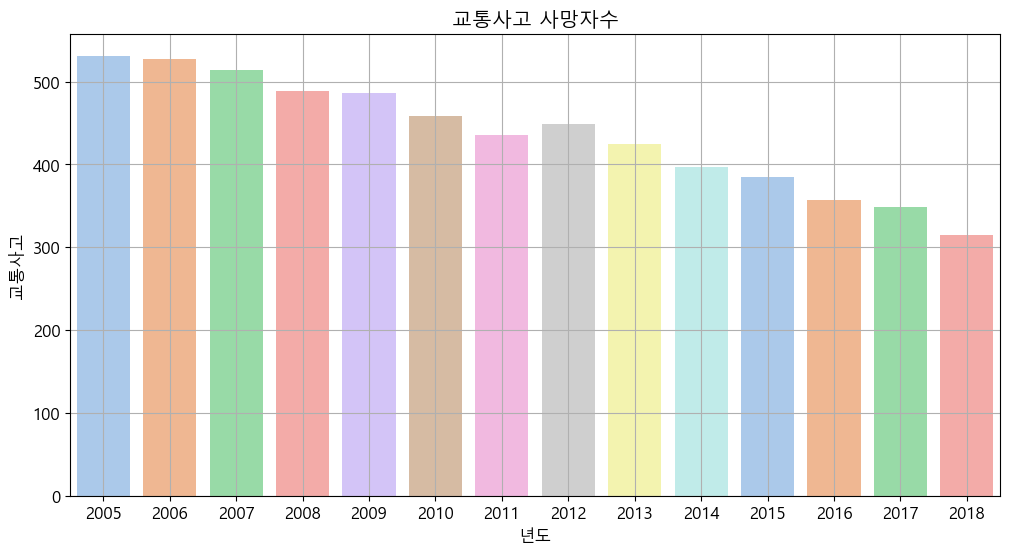

In [16]:
plt.figure()

# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.barplot(data=df, x=df.index, y='사망자수', palette='pastel')

plt.title('교통사고 사망자수')   
plt.xlabel("년도")     
plt.ylabel("교통사고") 
plt.grid()
plt.show()             
plt.close()            

### [4] 산점도 그래프

#### (1) 기본 산점도 그래프

`seaborn` 객체의 `scatterplot()` 메서드를 사용한다.

필요한 경우 `hue` 파라미터를 사용하여 두 개 이상의 지표에 대한 상관관계를 비교할 수 있다.

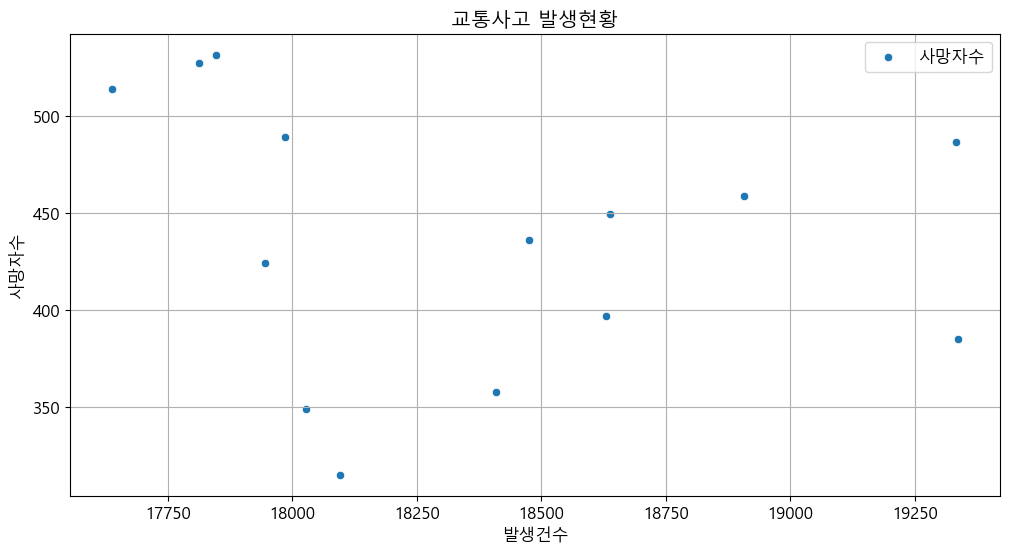

In [17]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.scatterplot(data=df, x='발생건수', y='사망자수', label='사망자수')

plt.title('교통사고 발생현황') 
plt.xlabel("발생건수")      
plt.ylabel("사망자수")   
plt.legend()
plt.grid()
plt.show()  
plt.close() 

#### (2) 복수 변수에 대한 산점도 비교

##### 데이터 전처리

In [18]:
df2 = melt(df, id_vars=['발생건수'], value_vars=['부상자수', '사망자수']).sort_values('발생건수')
df2.head()

,발생건수,variable,value
2,17638.500000,부상자수,27992.166667
16,17638.500000,사망자수,513.833333
1,17812.083333,부상자수,28352.416667
15,17812.083333,사망자수,527.250000
0,17847.583333,부상자수,28519.416667


##### 데이터 시각화

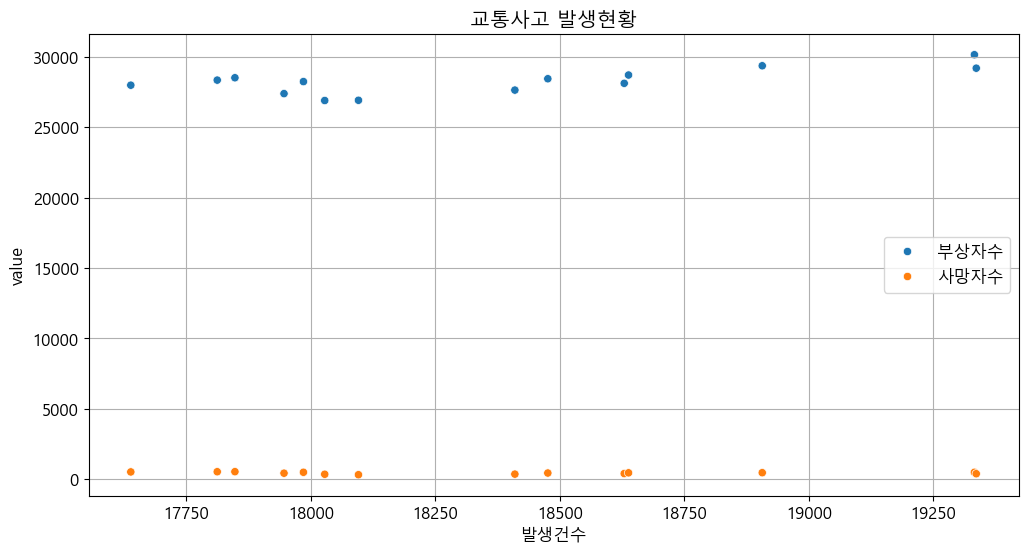

In [19]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.scatterplot(data=df2, x='발생건수', y='value', hue='variable')

plt.title('교통사고 발생현황')   
plt.legend()
plt.grid()
plt.show() 
plt.close() 

#### (3) 추세선을 포함한 산점도 그래프

`seaborn` 객체의 `regplot()` 메서드를 사용한다.

추세선 주변에 보이는 구간은 `95%` 신뢰구간임

`fit_reg=False`를 추가하면 추세선이 표시되지 않게 되어 scatterplot 메서드와 동일한 결과를 보여준다(기본값=True)

`ci` 파라미터는 신뢰수준을 설정하며 기본값은 `95`이다.

`line_kws` 파라미터는 선의 색상, `scatter_kws`는 점의 색상

`hue` 파라미터를 사용할 수 없다.

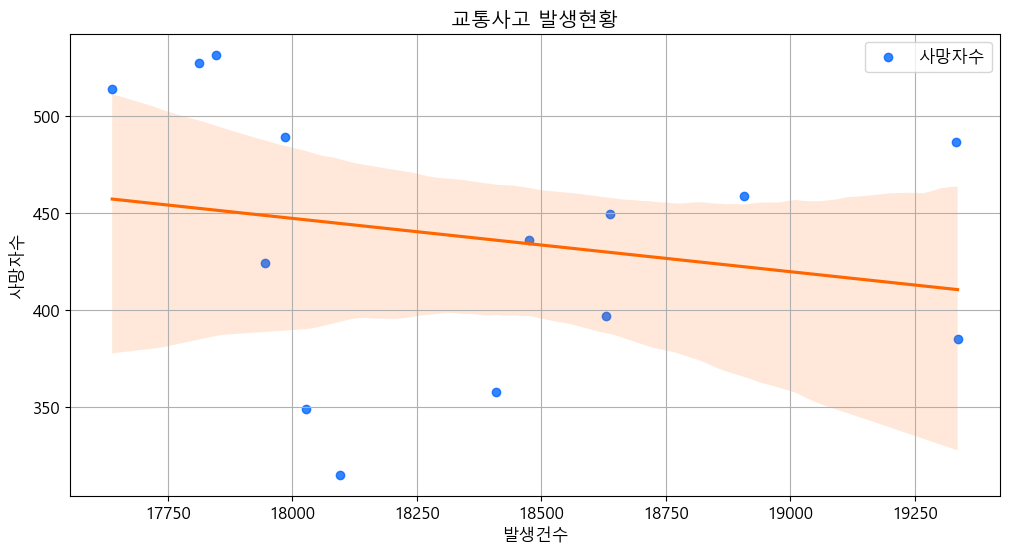

In [41]:
# 추세선을 함께 보여주는 산점도 그래프 그리기
sb.regplot(data=df, x='발생건수', y='사망자수', label='사망자수',
           line_kws={'color': '#ff6600'}, scatter_kws={'color': '#0066ff'})

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("발생건수")          # x축 제목
plt.ylabel("사망자수")          # y축 제목
plt.legend()
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

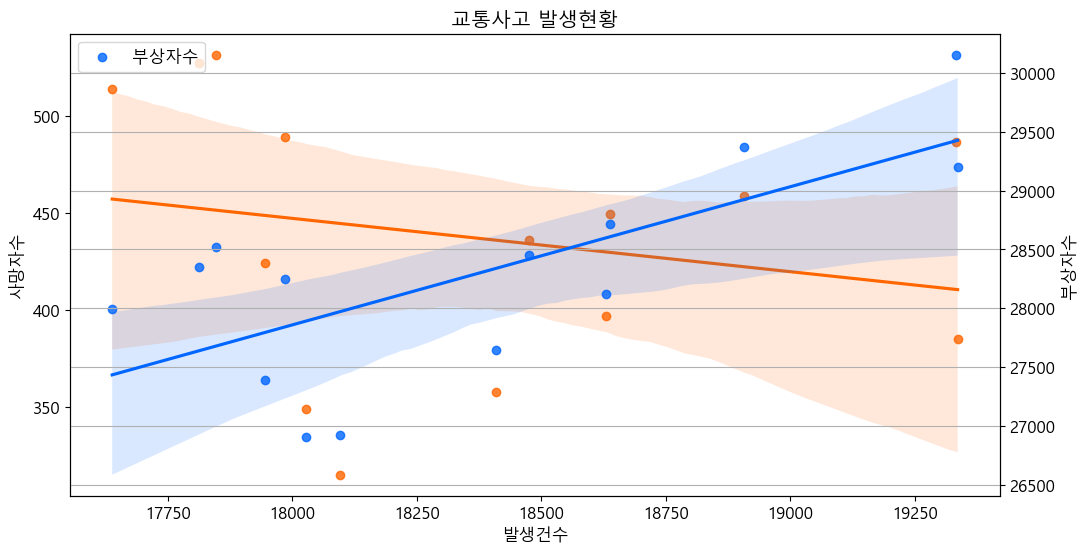

In [51]:
fig, ax1 = plt.subplots(1, 1)
ax2 = ax1.twinx()
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.regplot(data=df, x='발생건수', y='사망자수', label='사망자수',
           line_kws={'color': '#ff6600'}, scatter_kws={'color': '#ff6600'}, ax = ax1)
sb.regplot(data=df, x='발생건수', y='부상자수', label='부상자수',
           line_kws={'color': '#0066ff'}, scatter_kws={'color': '#0066ff'}, ax = ax2)

plt.title('교통사고 발생현황')   
plt.legend()
plt.grid()
plt.show() 
plt.close() 

### [5] 서브플롯에 기반한 선 그래프

> 서브 플롯을 사용하지 않을 경우 `sb.lineplot()` 함수에서 `ax` 파라미터 제거

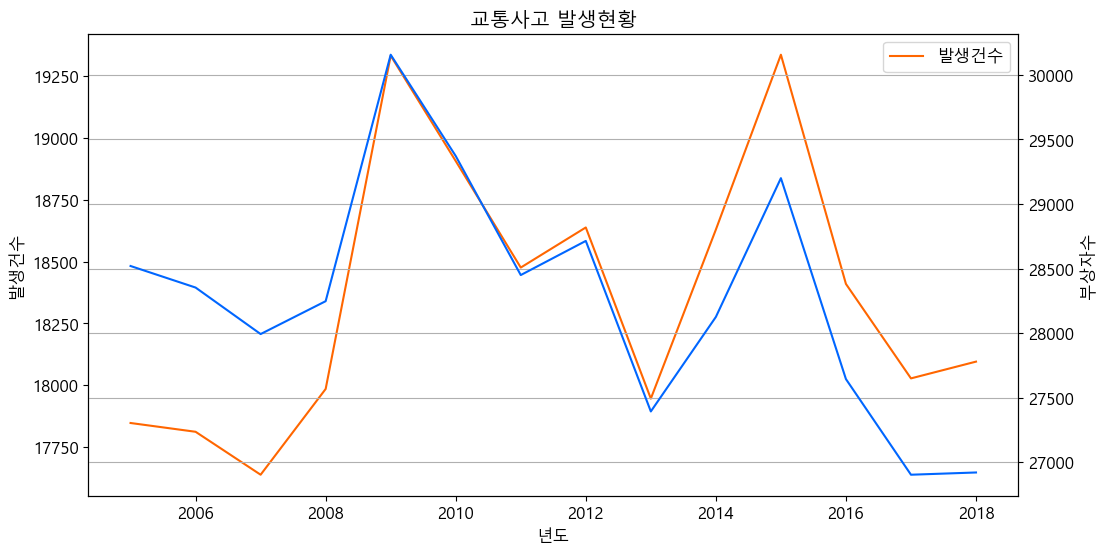

In [40]:
fig, ax1 = plt.subplots(1, 1)
ax2 = ax1.twinx()

# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(data=df, x=df.index, y='발생건수', label = '발생건수', color='#ff6600', ax=ax1)
sb.lineplot(data=df, x=df.index, y='부상자수', color='#0066ff', ax=ax2) # 둘다 label 표현시 같은 위치에 표시되어 잘 안보임
plt.title('교통사고 발생현황')
plt.xlabel("년도")     
plt.grid()
plt.show()           
plt.close()          